<strong>한글 깨짐 처리하기</strong>

In [ ]:
import matplotlib as mpl
import matplotlib.pyplot as plt
 
%config InlineBackend.figure_format = 'retina'
 
!apt -qq -y install fonts-nanum
 
import matplotlib.font_manager as fm

fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=9)
mpl.font_manager._rebuild()

fonts-nanum is already the newest version (20170925-1).
0 upgraded, 0 newly installed, 0 to remove and 39 not upgraded.


전주시 지도 그리기

In [ ]:
# # 지도를 그리기 위한 folium 라이브러리 import
# import folium

In [ ]:
# jeonju_map = folium.Map([35.824662951078665, 127.1480005], # 전주시청의 위도, 경도
#                         zoom_start=13,
#                         tiles='Stamen Terrain')
# jeonju_map

전주시 기온 데이터 불러오기

In [ ]:
# pandas 라이브러리 import
import pandas as pd

# 데이터 불러오기
df_jeonju = pd.read_csv('/content/jeonju_temperature_1930_2020.csv', encoding='cp949')

데이터 파악하기

In [ ]:
# column명과 데이터 타입과 갯수 확인
df_jeonju.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91 entries, 0 to 90
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   일시         91 non-null     int64  
 1   평균기온(℃)    91 non-null     float64
 2   평균최고기온(℃)  91 non-null     float64
 3   최고기온(℃)    91 non-null     float64
 4   최고기온일자     91 non-null     object 
 5   평균최저기온(℃)  91 non-null     float64
 6   최저기온(℃)    91 non-null     float64
 7   최저기온일자     91 non-null     object 
dtypes: float64(5), int64(1), object(2)
memory usage: 5.8+ KB


In [ ]:
df_jeonju.head(3)

,일시,평균기온(℃),평균최고기온(℃),최고기온(℃),최고기온일자,평균최저기온(℃),최저기온(℃),최저기온일자
0,1930,12.4,17.8,38.6,1930-07-11,8.0,-12.1,1930-01-20
1,1931,11.7,17.3,34.6,1931-08-09,7.1,-15.7,1931-01-11
2,1932,12.2,18.0,37.1,1932-07-26,7.6,-11.4,1932-12-13


In [ ]:
df_jeonju.tail(3)

,일시,평균기온(℃),평균최고기온(℃),최고기온(℃),최고기온일자,평균최저기온(℃),최저기온(℃),최저기온일자
88,2018,13.9,19.3,38.9,2018-08-13,9.5,-15.0,2018-01-27
89,2019,14.2,19.5,35.1,2019-08-14,9.7,-7.5,2019-12-06
90,2020,14.0,19.2,35.1,2020-06-09,9.7,-10.0,2020-12-31


In [ ]:
# 2020년의 기온과 각 년도의 각 기온 별 차이 보기
# 일시 타입을 datetime으로 바꿔주기
pd.to_datetime(df_jeonju['일시'])

df_jeonju = df_jeonju[['일시','평균기온(℃)','평균최고기온(℃)','최고기온(℃)','평균최저기온(℃)','최저기온(℃)']]
df_jeonju
# 각 열 2020년의 각 기온을 기준으로 빼주기
df_jeonju.sub(df_jeonju.loc[90], axis=1)

,일시,평균기온(℃),평균최고기온(℃),최고기온(℃),평균최저기온(℃),최저기온(℃)
0,-90.0,-1.6,-1.4,3.5,-1.7,-2.1
1,-89.0,-2.3,-1.9,-0.5,-2.6,-5.7
2,-88.0,-1.8,-1.2,2.0,-2.1,-1.4
3,-87.0,-2.2,-1.7,1.3,-2.5,-7.1
4,-86.0,-2.5,-1.8,0.0,-2.7,-5.5
...,...,...,...,...,...,...
86,-4.0,0.3,0.2,1.1,0.5,-3.0
87,-3.0,-0.4,-0.2,0.0,-0.5,0.3
88,-2.0,-0.1,0.1,3.8,-0.2,-5.0
89,-1.0,0.2,0.3,0.0,0.0,2.5


전주시의 기온 데이터 시각화

In [ ]:
# 시각화를 위해 라이브러리 import
import matplotlib.pyplot as plt

In [ ]:
# 전주시 최고 기온 데이터 시각화하기
# 일시 column이 x축으로 가고 y축이 최고기온 값이 된다

# x축 값이 될 날짜로 만들기
# df_jeonju['일시'] = pd.to_datetime(df_jeonju['일시'], format='%Y-%m')
# df_jeonju.info()
# jj_date = [date for date in df_jeonju['일시']]

# # y축에 들어갈 최고기온 리스트 내포로 만들기
# jj_max_temp = [temp for temp in df_jeonju['최고기온(℃)']]

In [ ]:
# 데이터 시각화
# plt.figure(dpi=200)
# plt.plot(jj_date, jj_max_temp)
# plt.show()

In [ ]:
# # year1 = ['1995','1996','1997','1998','1999','2000','2001','2002','2003','2004','2005','2006','2007']
# year95_08 = [str(year) for year in range(1995,2008)]
# print(len(year95_08))
# date95_07 = []
# for i in df_jeonju.index :
#   for j in range(13) :
#     if year1[j] in df_jeonju.loc[i, '일시'] :
#       date95_07.append(df_jeonju.loc[i, '일시'])
# print(date95_07)

In [ ]:
# years_total = []
# for i in range(1930,2021,13) :
#   a = i
#   b = a + 13
#   years = [str(year) for year in range(a,b)]
#   years_total.append(years)
# len(years_total[2])

In [ ]:
# date_result = []
# temp_result = []
# for i in range(7) :
#   date_result.append([])
#   temp_result.append([])
# date_result

In [ ]:
# for j in range(len(years_total)) : # 0~6 -> 7개
#   for k in range(len(years_total[j])) : # 0~12 -> 13개
#     for i in df_jeonju.index :
#       if years_total[j][k] in df_jeonju.loc[i, '일시'] :
#         date_result[j].append(df_jeonju.loc[i, '일시'])
# len(date_result[0])

전주시

In [ ]:
# 날짜와 기온을 담을 리스트 준비하기
# 1. 1930년 ~ 1942년 리스트
year30_42 = [year for year in range(1930, 1943)]
jj_30_42 = []
jj_30_42_temp = []

# 2. 1943년 ~ 1955년 리스트
year43_55 = [year for year in range(1943, 1956)]
jj_43_55 = []
jj_43_55_temp = []

# 3. 1956년 ~ 1968년 리스트
year56_68 = [year for year in range(1956, 1969)]
jj_56_68 = []
jj_56_68_temp = []

# 4. 1969년 ~ 1981년 리스트
year69_81 = [year for year in range(1969, 1982)]
jj_69_81 = []
jj_69_81_temp = []

# 5. 1982년 ~ 1994년 리스트
year82_94 = [year for year in range(1982, 1995)]
jj_82_94 = []
jj_82_94_temp = []

# 6. 1995년 ~ 2007년 리스트
year95_07 = [year for year in range(1995, 2008)]
jj_95_07 = []
jj_95_07_temp = []

# 7. 2008년 ~ 2020년 리스트
year08_20 = [year for year in range(2008, 2021)]
jj_08_20 = []
jj_08_20_temp = []

# 
for i in df_jeonju.index :
  for j in range(13) :
    if year30_42[j] == df_jeonju.loc[i, '일시'] :
      jj_30_42.append(df_jeonju.loc[i, '일시'])
      jj_30_42_temp.append(df_jeonju.loc[i, '평균기온(℃)'])

    elif year43_55[j] == df_jeonju.loc[i, '일시'] :
      jj_43_55.append(df_jeonju.loc[i, '일시'])
      jj_43_55_temp.append(df_jeonju.loc[i, '평균기온(℃)'])

    elif year56_68[j] == df_jeonju.loc[i, '일시'] :
      jj_56_68.append(df_jeonju.loc[i, '일시'])
      jj_56_68_temp.append(df_jeonju.loc[i, '평균기온(℃)'])

    elif year69_81[j] == df_jeonju.loc[i, '일시'] :
      jj_69_81.append(df_jeonju.loc[i, '일시'])
      jj_69_81_temp.append(df_jeonju.loc[i, '평균기온(℃)'])

    elif year82_94[j] == df_jeonju.loc[i, '일시'] :
      jj_82_94.append(df_jeonju.loc[i, '일시'])
      jj_82_94_temp.append(df_jeonju.loc[i, '평균기온(℃)'])
      
    elif year95_07[j] == df_jeonju.loc[i, '일시'] :
      jj_95_07.append(df_jeonju.loc[i, '일시'])
      jj_95_07_temp.append(df_jeonju.loc[i, '평균기온(℃)'])

    elif year08_20[j] == df_jeonju.loc[i, '일시'] :
      jj_08_20.append(df_jeonju.loc[i, '일시'])
      jj_08_20_temp.append(df_jeonju.loc[i, '평균기온(℃)'])

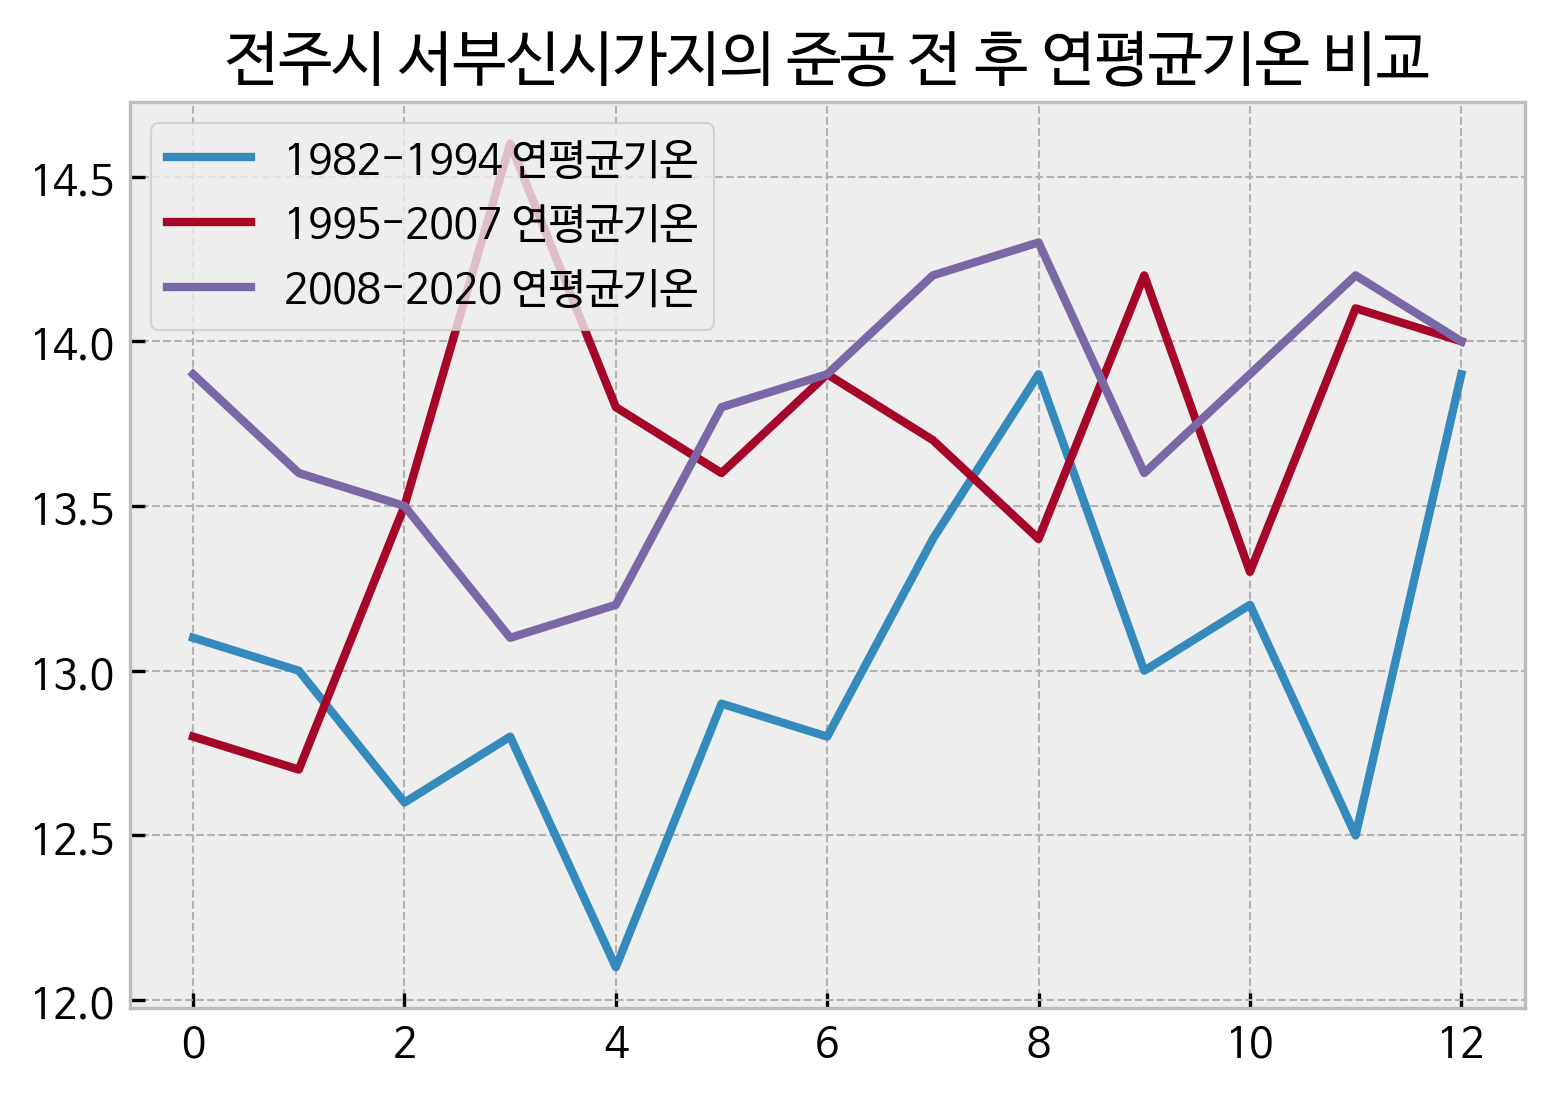

In [ ]:
# 데이터 시각화
# 차트 설정
plt.figure(dpi=150)
plt.style.use('bmh') # 스타일 지정
plt.rc('font', family = 'NanumBarunGothic') # 나눔 바른 고딕을 기본 글꼴로 설정 -> 한글 깨짐 처리
plt.rcParams['axes.unicode_minus'] = False # 마이너스 기호 깨짐 방지
# 차트 그리기
# plt.plot(jj_30_42_temp, label='1930-1942 연평균기온')
# plt.plot(jj_43_55_temp, label='1943-1955 연평균기온')
# plt.plot(jj_56_68_temp, label='1956-1968 연평균기온')
# plt.plot(jj_69_81_temp, label='1969-1981 연평균기온')
plt.plot(jj_82_94_temp, label='1982-1994 연평균기온')
plt.plot(jj_95_07_temp, label='1995-2007 연평균기온')
plt.plot(jj_08_20_temp, label='2008-2020 연평균기온')
plt.title('전주시 서부신시가지의 준공 전 후 연평균기온 비교')
plt.legend() # 범례 표시
plt.show()